# 3.9 Pivot table

# Motivating pivot tables

In [22]:
import numpy
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset("titanic")

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Pivot tables by hand

In [30]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [35]:
titanic.groupby(["sex", "class"])["survived"].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Pivot table syntax

In [36]:
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Multi-level pivot tables

In [40]:
age=pd.cut(titanic["age"], [0, 18, 80])

In [41]:
titanic.pivot_table("survived", index=["sex", age], columns="class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [43]:
fare=pd.qcut(titanic["fare"],2)

In [44]:
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [60]:
titanic.pivot_table("survived", index=["sex", age], columns=[fare, "class"])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Additional pivot table options

In [64]:
titanic.pivot_table(index="sex", columns="class", aggfunc={"survived": sum, "fare":"mean"})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [69]:
titanic.pivot_table(values="survived", index="sex", columns="class", margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Example: birthrate data

In [70]:
births=pd.read_csv("births.csv")

In [72]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [87]:
births["decade"]=10*(births["year"]//10)

In [88]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [89]:
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


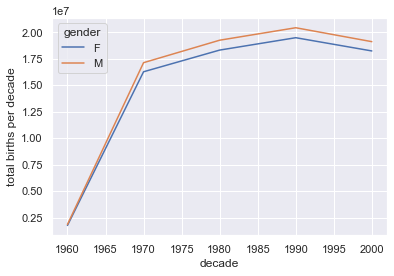

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum").plot()
plt.ylabel("total births per decade");

# 3.10 Vectorized string operations

# Introducing Pandas string operations

In [95]:
import numpy as np
x=np.array([2,3,5,7,11,13])

In [96]:
x

array([ 2,  3,  5,  7, 11, 13])

In [97]:
x*2

array([ 4,  6, 10, 14, 22, 26])

In [99]:
data=["peter", "paul", "mary", "guido"]

In [100]:
data

['peter', 'paul', 'mary', 'guido']

In [101]:
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [102]:
newdata=["peter", "paul", "mary", "guido", None]

In [103]:
newdata

['peter', 'paul', 'mary', 'guido', None]

In [104]:
[s.capitalize() for s in newdata]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [105]:
import pandas as pd
names=pd.Series(newdata)

In [106]:
names

0    peter
1     paul
2     mary
3    guido
4     None
dtype: object

In [107]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
4     None
dtype: object

# Tabels of Pandas string methods

In [108]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [112]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

## Methods similar to Python string methods

In [115]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [116]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [121]:
monte.str.startswith("T")

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [122]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## Methods using regular expressions

## Miscellaneous methods

In [127]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [125]:
monte.str.get(1)

0    r
1    o
2    e
3    r
4    e
5    i
dtype: object

In [128]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [136]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [137]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})

In [138]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [139]:
full_monte["info"]

0    B|C|D
1      B|D
2      A|C
3      B|D
4      B|C
5    B|C|D
Name: info, dtype: object

In [140]:
full_monte["info"].str.get_dummies("|")

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [141]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object